In [3]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
data = pd.read_csv('Downloads\MagicTelescope-1.csv')
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
data.loc[:,'class'] = en.transform(data['class'])

In [4]:
label = data['class']
div = data.drop('class', axis = 'columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(div, label, test_size = 0.2 )

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred))

Accuracy score:  0.7200315457413249


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      2472
           1       0.69      0.36      0.48      1332

    accuracy                           0.72      3804
   macro avg       0.71      0.64      0.64      3804
weighted avg       0.71      0.72      0.69      3804



<AxesSubplot:>

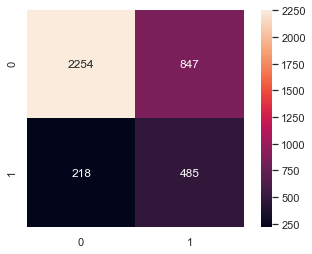

In [7]:
from sklearn.metrics import confusion_matrix , roc_curve, auc
co = confusion_matrix(y_test, y_pred)
import seaborn as sns; sns.set()
sns.heatmap(co.T, square=True, annot=True, fmt='d', cbar=True)

ROC 0.637963205924371


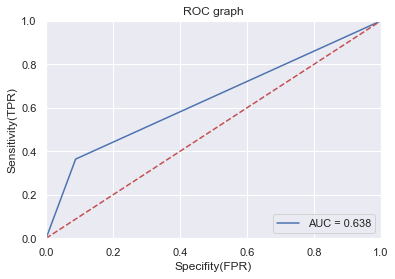

In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc = auc(false_positive_rate, true_positive_rate)
print('ROC',roc)
plt.title('ROC graph')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.3f' %roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensitivity(TPR)')
plt.xlabel('Specifity(FPR)')
plt.show()

In [15]:
TP = co[0][0]
FP = co[0][1]
FN = co[1][0]
TN = co[1][1]
FP = FP.astype(float)
TP = TP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)

In [16]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

In [17]:
print("TPR" ,TPR)
print("FPR" ,FPR)

TPR 0.7268623024830699
FPR 0.310099573257468
